# Clase 3
Aplicaremos métodos de clustering para tratar de analizar un conjunto de respuestas a una encuesta política, que consiste en 26 afirmaciones en que el encuestado responde con un puntaje de 1 a 5, donde 1 expresa desacuerdo con la afirmacion y 5 muy de acuerdo. Los datos fueron recabados en 2019 por parte de [a quien voto](https://github.com/johnblanco/predictor_electoral).

-------
La siguiente celda descarga el dataset desde EVA y lo descomprime.

**Nota: solo corre en linux, si estan en otro sistema ooperativo, descarguen el archivo a mano y ponganlo en la carpeta donde tienen el notebook**.

In [1]:
#! wget -O data-a-quien-voto.zip https://eva.fing.edu.uy/pluginfile.php/255716/mod_folder/content/0/data-a-quien-voto.zip?forcedownload=1
#! unzip data-a-quien-voto.zip

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carga de datos
Los datos vienen en un archivo CSV. Ya incluimos la carga del archivo y otros datos de referencia.

In [3]:
msj = """No se encontró data.csv, asegurate haberlo descargado
"y descomprimirlo  en la carpeta correcta"""
assert os.path.isfile('data.csv'), msj

# Importamos los datos utilizando pandas
datos = pd.read_csv("data.csv")

# Creo la tabla de candidatos a mano
candidatos = pd.DataFrame(
    [
        [1,'Oscar Andrade', 'Frente Amplio'],
        [2,'Mario Bergara', 'Frente Amplio'],
        [3,'Carolina Cosse', 'Frente Amplio'],
        [4,'Daniel Martínez', 'Frente Amplio'],
        [5,'Verónica Alonso', 'Partido Nacional'],
        [6,'Enrique Antía', 'Partido Nacional'],
        [8,'Carlos Iafigliola', 'Partido Nacional'],
        [9,'Luis Lacalle Pou', 'Partido Nacional'],
        [10,'Jorge Larrañaga', 'Partido Nacional'],
        [11,'Juan Sartori', 'Partido Nacional'],
        [12,'José Amorín', 'Partido Colorado'],
        [13,'Pedro Etchegaray', 'Partido Colorado'],
        [14,'Edgardo Martínez', 'Partido Colorado'],
        [15,'Héctor Rovira', 'Partido Colorado'],
        [16,'Julio María Sanguinetti', 'Partido Colorado'],
        [17,'Ernesto Talvi', 'Partido Colorado'],
        [18,'Pablo Mieres', 'La Alternativa'],
        [19,'Gonzalo Abella', 'Unidad Popular'],
        [20,'Edgardo Novick', 'Partido de la Gente'],
        [21,'César Vega', 'PERI'],
        [22,'Rafael Fernández', 'Partido de los Trabajadores'],
        [23,'Justin Graside', 'Partido Digital'],
        [24,'Gustavo Salle', 'Partido Verde'],
        [25,'Carlos Techera', 'Partido de Todos']
    ],
    columns=['candidatoId','name','party'],
)

datos=datos.merge(candidatos,on=['candidatoId'])

# Sólo por si necesita, cargamos un diccionario con el texto de cada pregunta
preguntas={
    '1': 'Controlar la inflación es más importante que controlar el desempleo. ',
    '2': 'Hay que reducir la cantidad de funcionarios públicos',
    '3': 'Deberia aumentar la carga de impuestos para los ricos.',
    '4': 'El gobierno no debe proteger la industria nacional, si las fábricas no son competitivas esta bien que desaparezcan.',
    '5': 'La ley de inclusión financiera es positiva para la sociedad. ',
    '6': 'Algunos sindicatos tienen demasiado poder. ',
    '7': 'Cuanto más libre es el mercado, más libre es la gente. ',
    '8': 'El campo es y debe ser el motor productivo de Uruguay. ',
    '9': 'La inversión extranjera es vital para que Uruguay alcance el desarrollo. ',
    '10': 'Los supermercados abusan del pueblo con sus precios excesivos. ',
    '11': 'Con la vigilancia gubernamental (escuchas telefonicas, e-mails y camaras de seguridad) el que no tiene nada que esconder, no tiene de que preocuparse. ',
    '12': 'La pena de muerte debería ser una opción para los crímenes mas serios. ',
    '13': 'Uruguay debería aprobar más leyes anti corrupción y ser más duro con los culpables. ',
    '14': 'Las FF.AA. deberían tener un rol activo en la seguridad pública. ',
    '15': 'Las carceles deberían ser administradas por organizaciones privadas. ',
    '16': 'Hay que aumentar el salario de los policias significativamente. ',
    '17': 'Para los delitos más graves hay que bajar la edad de imputabilidad a 16 años. ',
    '18': 'Uruguay no necesita un ejército. ',
    '19': 'Uruguay es demasiado generoso con los inmigrantes. ',
    '20': 'La ley trans fue un error. ',
    '21': 'El feminismo moderno no busca la igualdad sino el poder. ',
    '22': 'Para la ley no deberia diferenciarse homicidio de femicidio. ',
    '23': 'La separación de estado y religión me parece importante. ',
    '24': 'La legalización de la marihuana fue un error. ',
    '25': 'La legalización del aborto fue un error. ',
    '26': 'El foco del próximo gobierno debe ser mejorar la educación pública. '
}

# Ordeno los datos por partido y luego por candidato

datos = datos.sort_values(by=['party','name'])

Cada fila es la respuesta de una persona, contiene un id único, el candidato que eligió, las repuestas a las 26 preguntas y la fecha. Además le agregamos el nombre del candidato y el partido al que pertenece.

Imprimimos algunos datos de prueba para asegurarnos de que quedaron bien cargados.

In [4]:
datos.head()

,id,candidatoId,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,fecha,name,party
21387,38,3,4,4,3,4,5,5,3,2,...,1,1,1,5,1,1,5,2019-02-06T16:52:06.318997,Carolina Cosse,Frente Amplio
21388,39,3,3,4,5,2,4,4,2,2,...,1,1,2,5,1,1,3,2019-02-06T17:00:09.220160,Carolina Cosse,Frente Amplio
21389,41,3,2,3,4,2,4,4,2,2,...,1,2,2,5,1,1,4,2019-02-06T17:14:33.621159,Carolina Cosse,Frente Amplio
21390,42,3,4,4,3,4,4,4,3,3,...,3,3,2,5,2,2,4,2019-02-06T17:44:43.482259,Carolina Cosse,Frente Amplio
21391,44,3,4,5,3,3,4,5,5,4,...,2,4,4,5,2,1,5,2019-02-06T18:30:28.400279,Carolina Cosse,Frente Amplio


El siguiente codigo lo vamos a utilizar para graficar la cantidad de votantes auto-declarados por partido:

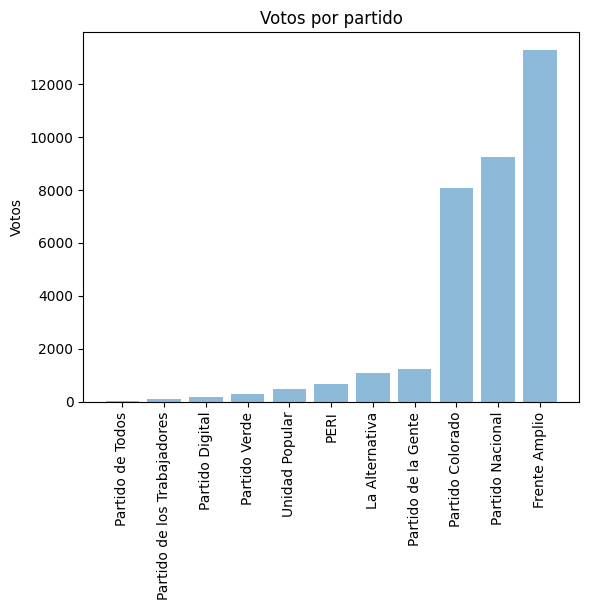

In [5]:
unq, cnt = np.unique(datos['party'], return_counts=True)
idx = np.argsort(cnt)

plt.bar(unq[idx], cnt[idx], align='center', alpha=0.5)
plt.ylabel('Votos')
plt.title('Votos por partido')
plt.xticks(rotation=90);

En la siguiente celda, vamos a obtener los siguientes conjuntos de datos, como numpy arrays:
- Un conjunto con datos de todos los votantes
- Un conjunto análogo al anterior, pero solo con los del Frente Amplio
- Un conjunto análogo al anterior, pero solo con los del Partido Nacional
- Un conjunto análogo al anterior, pero solo con los del Partido Colorado

In [6]:
votos = datos[[str(x) for x in np.arange(1,27)]].values
votos_fa = datos[datos['party']=='Frente Amplio'][[str(x) for x in np.arange(1,27)]].values
votos_pn = datos[datos['party']=='Partido Nacional'][[str(x) for x in np.arange(1,27)]].values
votos_pc = datos[datos['party']=='Partido Colorado'][[str(x) for x in np.arange(1,27)]].values

# PCA
Utilizaremos la técnica de PCA para poder visualizar mejor los datos y luego los resultados del clustering.

El siguiente código creará una transformación a dos dimensiones de los datos y definirá el método plot_pca_data() para visualizar los votos en dos dimensiones. El método toma como entrada una lista de pares (datos,color), lo que permitirá visualizar diferentes resultados en el mismo gráfico.

Uso: _plot_pca_data([(conjunto1,color1), (conjunto2,color2), ...])_

Donde _color_ puede ser 'r', 'g', 'b', 'y', 'k', etc.

Opcionalmente, podemos indicar un conjunto de centroides a dibujar: _plot_pca_data([(conjunto1,color1), (conjunto2,color2), ...], centroides)_

In [7]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def plot_pca_data(data_list=[],centroids=None):
    """
    Esta funcion permite transformar los datos a dos dimensiones utilizando
    PCA y mostrarlos graficamente con el color indicado.
    data_list: lista de pares (votos, color), donde votos es un numpy array
        de forma (n_votos, n_features), y color es un string que
        identifica un color valido en matplotlib
    centroids: opcional, numpy array de la forma (n_votos, features) donde
        cada uno de los n_votos es un centroide
    """
    # Esta base es la que se usa para generar los graficos en 2d
    # Como tarea pueden probar usar sklearn.manifold.TSNE que genera mejores
    # visualizaciones, pero es bastante mas lento.
    data = np.row_stack([d[0] for d in data_list])
    pca = make_pipeline(StandardScaler(), PCA(n_components=2, whiten=True)).fit(data)

    # El codigo que sigue se usa para graficar
    plt.figure(figsize=(15,10))
    x_min,x_max,y_min,y_max = np.inf,-np.inf,np.inf,-np.inf

    for data,color in data_list:
        # Pasamos los datos a 2d
        reduced = pca.transform(data)
        x_min = min(x_min,reduced[:, 0].min() - 1)
        x_max = max(x_max,reduced[:, 0].max() + 1)
        y_min = min(y_min,reduced[:, 1].min() - 1)
        y_max = max(y_max,reduced[:, 1].max() + 1)
        plt.scatter(reduced[:, 0], reduced[:, 1], color=color, alpha=.3, s=4)

    if centroids is not None:
        r_centroids = pca.transform(centroids)
        plt.scatter(r_centroids[:,0], r_centroids[:,1], marker='*', s=169, linewidths=3, color='lime', zorder=10)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

**IMPLEMENTAR:** Dibuje un gráfico de todos los votos.

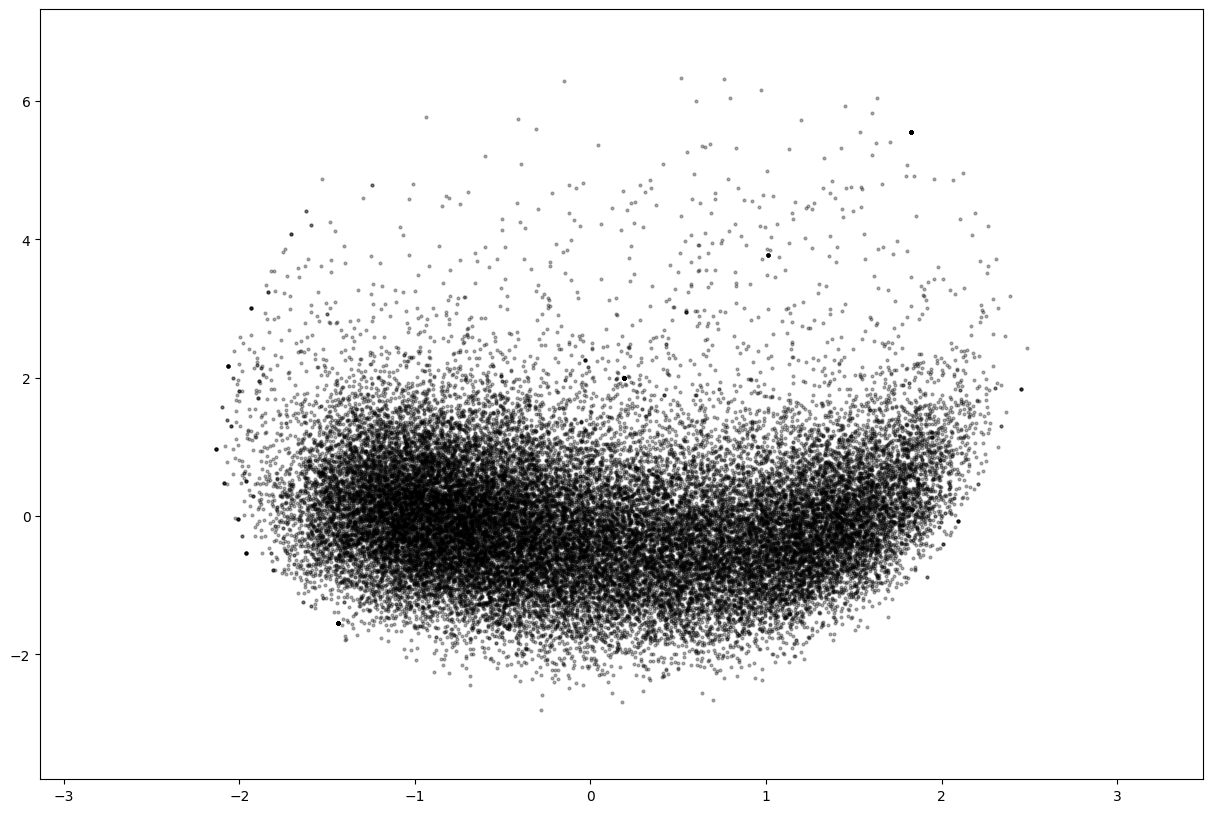

In [8]:
# === Su código empieza acá ===
data_list = [(votos, 'black')]
plot_pca_data(data_list = data_list)
# === Su código termina acá ===

**IMPLEMENTAR:** Dibuje un gráfico de los votos del Frente Amplio, Partido Nacional y Partido Colorado con diferentes colores para poder visualizarlos mejor.

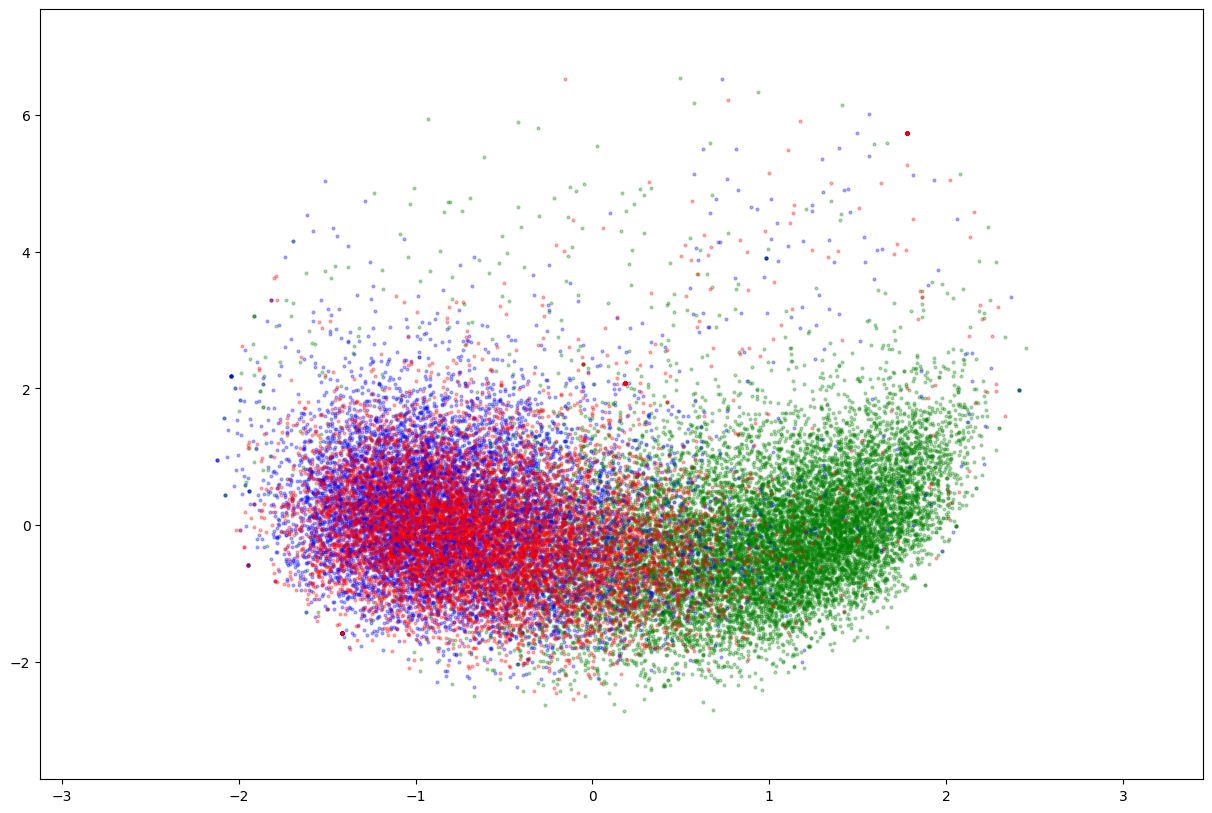

In [9]:
# === Su código empieza acá ===
data_list = [(votos_fa, 'green'), (votos_pn, 'blue'), (votos_pc, 'red')]
plot_pca_data(data_list = data_list)
# === Su código termina acá ===

# Clustering

Aplicaremos el algoritmo de K-means para clusterizar todas las respuestas.

Comencemos por entrenar dos modelos con 10 clusters cada uno, pero distintas cantidades de inicializaciones (`n_init`): uno con `n_init=1` y el otro con `n_init=20`. Mostrar en cada caso el SSE (`inertia_`)

**Pregunta**
Que se observa?

**Respuesta**
Es posible apreciar que la inercia disminuye al realizar una mayor cantidad de inicializaciones. Esto ocurre porque el algoritmo de K-means es sensible a los puntos de inicialización, es decir, a los centroides iniciales considerados, y la solución encontrada corresponde a un mínimo local. Por esto, realizar más inicializaciones permite encontrar mejores soluciones. Al realizar 20 inicializaciones, la solución con la que nos quedamos es la que tiene la menor inercia de las 20 soluciones encontradas, por lo cual es esperable que la inercia sea menor que para el caso de una única inicialización.

In [10]:
from sklearn.cluster import KMeans
# === Su código empieza acá ===
RANDOM_STATE = 0
kmeans_1 = KMeans(n_clusters=10, n_init=1, random_state = RANDOM_STATE)
kmeans_1.fit(votos)
kmeans_20 = KMeans(n_clusters=10, n_init=20, random_state = RANDOM_STATE)
kmeans_20.fit(votos)

for kmeans,n_init in zip([kmeans_1, kmeans_20],[1,20]):
    print (f'SSE para {n_init} inicializaciones: {round(kmeans.inertia_,2)}')

inrt1 = kmeans_1.inertia_
inrt20 = kmeans_20.inertia_

print (f'La inercia disminuye en un {round((inrt1-inrt20)/inrt20,4)*100}% al realizar 20 inicializaciones')
# === Su código termina acá ===

SSE para 1 inicializaciones: 1117807.33
SSE para 20 inicializaciones: 1116892.17
La inercia disminuye en un 0.08% al realizar 20 inicializaciones


A continuacion, intentaremos encontrar la mejor cantidad de clusters K para este conjunto.

**IMPLEMENTAR:** Realice el clustering de K-means para diferentes valores de K y grafique el costo de cada clustering (inertia).

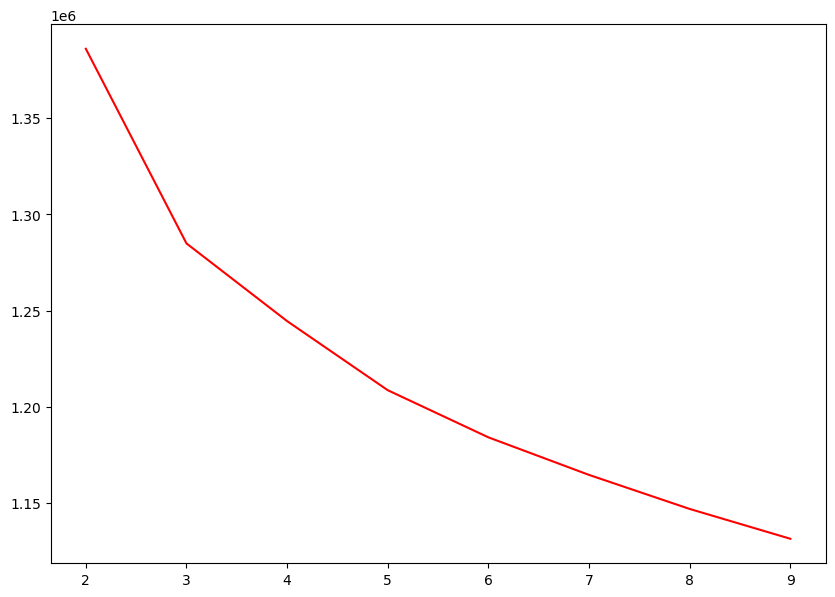

In [11]:
from sklearn.cluster import KMeans

n_clusters = []
inertias = []

for k in range(2,10):
    # === Su código empieza acá ===
    kmeans = KMeans(n_clusters = k, n_init = 20, random_state = RANDOM_STATE)
    kmeans.fit(votos)
    inrt = kmeans.inertia_# type: float
    # === Su código termina acá ===
    n_clusters.append(k)
    inertias.append(inrt)

plt.figure(figsize=(10,7))
plt.plot(n_clusters, inertias,'r-',markersize=1)
plt.show()

**IMPLEMENTAR:** Otra técnica que puede servir es medir el coeficiente de silueta. Realice el clustering de K-means para diferentes valores de K y grafique el coeficiente de silueta para cada uno.

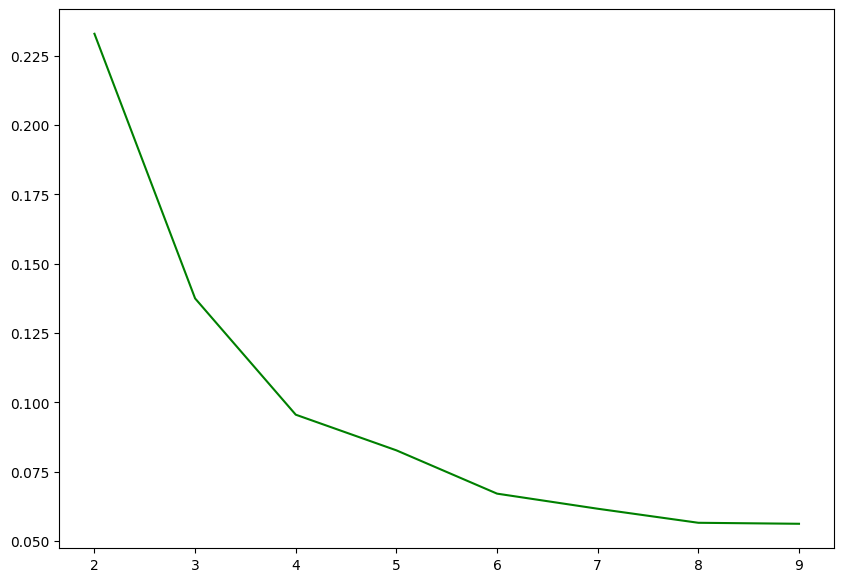

In [13]:
from sklearn.metrics import silhouette_score

n_clusters = []
silhouettes = []

for k in range(2,10):
    # === Su código empieza acá ===
    kmeans = KMeans(n_clusters = k, n_init = 5, random_state = RANDOM_STATE)
    labels = kmeans.fit_predict(votos)
    s = silhouette_score(votos, labels = labels)  # type: float silhouette score
    # === Su código termina acá ===
    n_clusters.append(k)
    silhouettes.append(s)

plt.figure(figsize=(10,7))
plt.plot(n_clusters, silhouettes,'g-',markersize=1)
plt.show()

In [14]:
print (f's(K=3) / s(K=5) = {round(silhouettes[1]/silhouettes[3],2)}')
print (f'SSE(K=5) / SSE(K=3) = {round(inertias[3]/inertias[1],2)}')

s(K=3) / s(K=5) = 1.66
SSE(K=5) / SSE(K=3) = 0.94


**PREGUNTA**

A partir de los experimento anteriores, qué valor de k parece más adecuado? **Justifique**.

**IMPLEMENTAR** Realice el clustering con K-means para el valor de k encontrado, imprima SSE y coeficiente de silueta y grafique los resultados en dos colores junto con sus centroides.

**Respuesta**
Analizando la primera gráfica, es posible ver que los valores **K** para los cuales la desaceleración de la disminución de la inercia es más marcada corresponden a **K = 3** y **K = 5**, por lo que, si se aplica el criterio del codo para la elección de **K**, utilizar alguno de estos dos valores sería razonable. Sin embargo, también se busca maximizar el valor del coeficiente de silueta, lo que se logra con un valor de **K** menor de acuerdo a la segunda gráfica.
En virtud de esto, y dado que el coeficiente de silueta es 64% mayor para **K = 3** que para **K = 5** mientras que la inercia es solamente un 6% menor, se opta por utilizar un valor de **K = 3**, es decir, 3 clusters.

SSE = 1284848.92 para 3 clusters y 20 inicializaciones
Coeficiente de silueta = 0.14 para 3 clusters y 20 inicializaciones


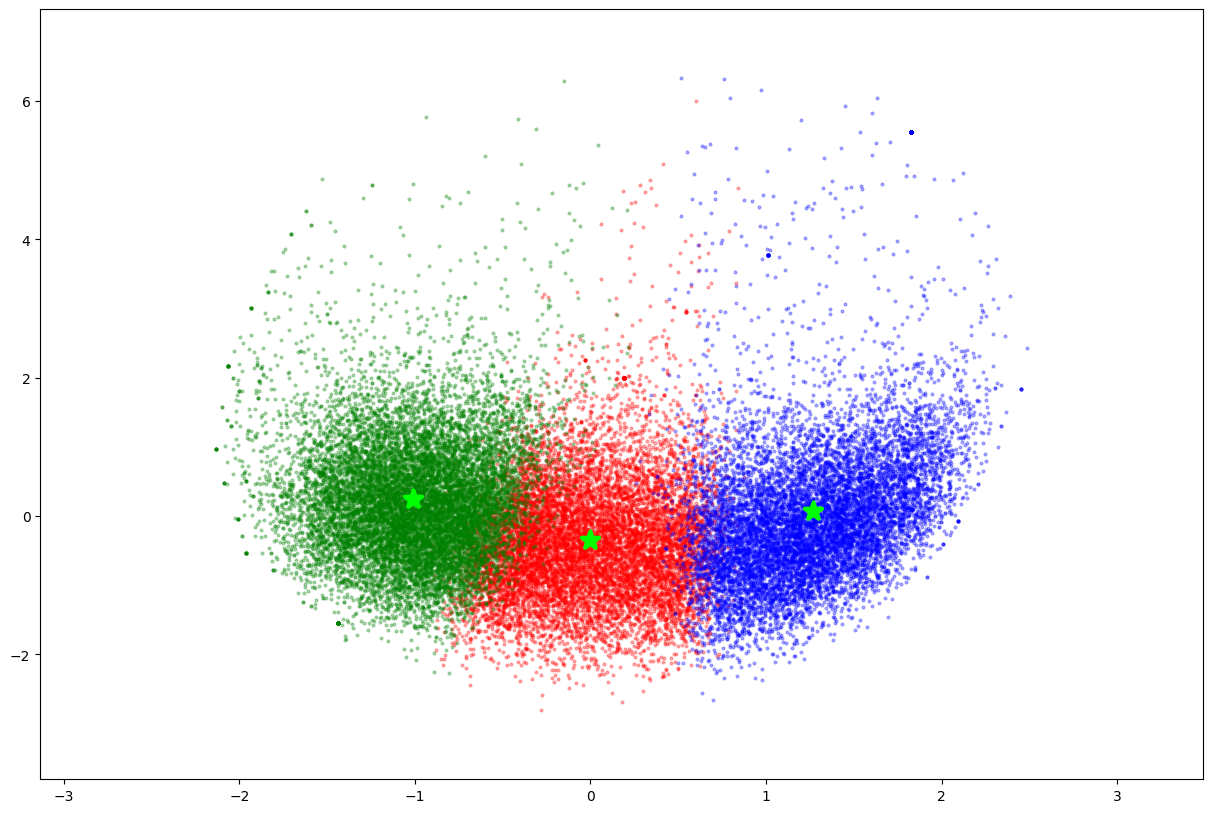

In [15]:
# === Su código empieza acá ===
k_opt = 3
n_init = 20
kmeans = KMeans(n_clusters = k_opt, n_init = n_init, random_state = RANDOM_STATE)
kmeans.fit(votos)

# SSE
print (f'SSE = {round(kmeans.inertia_,2)} para {k_opt} clusters y {n_init} inicializaciones')

# Coeficiente de silueta
labels = kmeans.predict(votos)
s = silhouette_score(votos, labels = labels)
print (f'Coeficiente de silueta = {round(s,2)} para {k_opt} clusters y {n_init} inicializaciones')

# Centroides
centroids = kmeans.cluster_centers_

# Ploteo
colors = ['red', 'blue', 'green', 'black', 'orange', 'yellow', 'brown', 'pink']
data_list = [(votos[labels == i],colors[i]) for i in range(k_opt)]

plot_pca_data(data_list = data_list, centroids = centroids)
# === Su código termina acá ===

# Análisis supervisado
Hasta el momento no tuvimos en cuenta las etiquetas, pero podemos utilizar las etiquetas para tener una idea si los clusters encontrados se parecen a conjuntos conocidos.

Vamos a quedarnos unicamente con los votos para los tres partidos mayoritarios, y sus respectivas etiquetas:

In [16]:
votos_tres = np.row_stack([votos_fa,votos_pn,votos_pc])
etiquetas_tres = np.concatenate([
    np.full(len(votos_fa), 0), # FA -> 0
    np.full(len(votos_pn), 1), # PN -> 1
    np.full(len(votos_pc), 2), # PC -> 2
])
print(votos_tres.shape)
print(etiquetas_tres.shape)

(30631, 26)
(30631,)


Dado que sabemos que hay tres grupos de votantes bien diferentes (FA, PN y PC), queremos ver si, utilizando k-means, podemos construir tres clusters que los contenga.


**IMPLEMENTAR:**
Entrenar un k-means con los votantes de estos tres partidos y tres clusters.

Imprimir los valores de SSE y coeficiente de silueta.

Utilizando el conjunto de etiquetas esperadas, imprima los valores de Índice de Rand Ajustado, Homogeneidad, Completitud y medida V.

In [17]:
from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score

# === Su código empieza acá ===
# KMeans
k = 3
n_init = 20
kmeans = KMeans(n_clusters = k, n_init = n_init, random_state = RANDOM_STATE)
labels = kmeans.fit_predict(votos_tres)

# SSE
print (f'SSE = {round(kmeans.inertia_,2)} para {k} clusters y {n_init} inicializaciones')

# Coeficiente de silueta
s = silhouette_score(votos_tres, labels = labels)
print (f'Coeficiente de silueta = {round(s,2)} para {k} clusters y {n_init} inicializaciones')

# Métricas
ARI = adjusted_rand_score(labels_true = etiquetas_tres, labels_pred = labels)
homog_score = homogeneity_score(labels_true = etiquetas_tres, labels_pred = labels)
comp_score = completeness_score(labels_true = etiquetas_tres, labels_pred = labels)
v_score = v_measure_score(labels_true = etiquetas_tres, labels_pred = labels)

print (f'Adjusted Rand Score = {round(ARI,3)}')
print (f'Homogeneity Score = {round(homog_score,3)}')
print (f'Completeness Score = {round(comp_score,3)}')
print (f'V Measure Score = {round(v_score,3)}')
assert 2*homog_score*comp_score/(homog_score+comp_score) == v_score

# === Su código termina acá ===

SSE = 1117916.82 para 3 clusters y 20 inicializaciones
Coeficiente de silueta = 0.14 para 3 clusters y 20 inicializaciones
Adjusted Rand Score = 0.309
Homogeneity Score = 0.322
Completeness Score = 0.317
V Measure Score = 0.319


**IMPLEMENTAR:** Mostrar un reporte de clasificacion con las etiquetas devueltas por el clustering y las etiquetas esperadas. ¿Qué problema puede tener esta matriz? Como se puede solucionar?

**Opcional** Implemente su propuesta de solucion


In [18]:
from sklearn.metrics import classification_report
# === Su código empieza acá ===
print(classification_report(y_true = etiquetas_tres, y_pred = labels))
# === Su código termina acá ===

              precision    recall  f1-score   support

           0       0.41      0.29      0.34     13288
           1       0.57      0.71      0.63      9261
           2       0.03      0.04      0.04      8082

    accuracy                           0.35     30631
   macro avg       0.34      0.35      0.34     30631
weighted avg       0.36      0.35      0.35     30631



**Respuesta**
El problema que puede tener esta matriz es que las etiquetas esperadas corresponden a grupos de votantes explícitamente definidos (0 = FA, 1 = PN, 2 = PC), mientras que las etiquetas asignadas a los clusters generados por K-means serán aleatorias. Es decir, una etiqueta generada por el algoritmo de K-means no tiene por qué corresponderse con la misma etiqueta real. El único significado de las etiquetas asignadas por K-means es que los puntos que tienen la misma etiqueta pertenecerán al mismo cluster, pero las etiquetas son intercambiables entre sí y el resultado seguirá siendo el mismo.
El problema se podría solucionar calculando las métricas seis veces para cada etiqueta real, cambiando la etiqueta de K-means con la cual se compara cada vez, y manteniendo una coherencia tal que cada etiqueta real distinta se compare siempre con una etiqueta de K-means distinta (es decir, que no se comparen dos etiquetas reales con la misma etiqueta de K-means en una misma iteración). Las distintas combinaciones a considerar son indicadas en la siguiente tabla.

| Real | K-means_1 | K-means_2 | K-means_3 | K-means_4 | K-means_5 | K-means_6 |
|------|---------|---------|---------|---------|---------|---------|
| 0 | 0 | 0 | 1 | 1 | 2 | 2	|
| 1 | 1 | 2 | 0 | 2 | 1 | 0 |
| 2 | 2 | 1 | 2 | 0 | 0 | 1 |

In [19]:
# IMPLEMENTACIÓN DE SOLUCIÓN
# k-means_1
labels_1 = labels.copy()

# k-means_2
labels_2 = labels.copy()
labels_2[labels_2 == 1] = 3 # Se pasa primero a una etiqueta no usada para no pisar las etiquetas de 2 existentes
labels_2[labels_2 == 2] = 1
labels_2[labels_2 == 3] = 2

# k-means_3
labels_3 = labels.copy()
labels_3[labels_3 == 0] = 3
labels_3[labels_3 == 1] = 0
labels_3[labels_3 == 3] = 1

# k-means_4
labels_4 = labels_3.copy()
labels_4[labels_4 == 0] = 3
labels_4[labels_4 == 2] = 0
labels_4[labels_4 == 3] = 2

# k-means_5
labels_5 = labels_4.copy()
labels_5[labels_5 == 1] = 3
labels_5[labels_5 == 2] = 1
labels_5[labels_5 == 3] = 2

# k-means_6
labels_6 = labels_5.copy()
labels_6[labels_6 == 1] = 3
labels_6[labels_6 == 0] = 1
labels_6[labels_6 == 3] = 0

for i,l in enumerate([labels_1, labels_2, labels_3, labels_4, labels_5, labels_6]):
    print (f'\n----------------CLASSIFICATION REPORT - K-MEANS_{i+1}---------------')
    print(classification_report(y_true = etiquetas_tres, y_pred = l))


----------------CLASSIFICATION REPORT - K-MEANS_1---------------
              precision    recall  f1-score   support

           0       0.41      0.29      0.34     13288
           1       0.57      0.71      0.63      9261
           2       0.03      0.04      0.04      8082

    accuracy                           0.35     30631
   macro avg       0.34      0.35      0.34     30631
weighted avg       0.36      0.35      0.35     30631


----------------CLASSIFICATION REPORT - K-MEANS_2---------------
              precision    recall  f1-score   support

           0       0.41      0.29      0.34     13288
           1       0.02      0.03      0.03      9261
           2       0.39      0.56      0.46      8082

    accuracy                           0.28     30631
   macro avg       0.27      0.29      0.27     30631
weighted avg       0.29      0.28      0.28     30631


----------------CLASSIFICATION REPORT - K-MEANS_3---------------
              precision    recall  f1-sc

Si se compara, para cada métrica (precision, recall y f1-score), el valor máximo, intermedio y mínimo obtenido en cada iteración con los correspondientes de las otras iteraciones, la que presenta mejores valores de métricas corresponde a **K-means_5**. Asimismo, el valor mayor de accuracy también se obtiene en esa iteración. Se asume, entonces, que los clusters encontrados por K-means son más similares a los tres grupos distintos de votantes si se compara a los votantes del FA con los etiquetados con 2, a los votantes del PN con los etiquetados con 1 (misma etiqueta que la real), y a los votantes del PC con los etiquetados con 0 (en resumen, intercambiando las etiquetas 2 y 0 arrojadas por K-means). Esto se resume en la siguiente tabla. Asimismo, se imprime el classification report de la mejor iteración en la celda siguiente.

| Etiqueta real | Partido | Comparar con etiqueta |
|------|---------|---------|
| 0 | FA | 2 |
| 1 | PN | 1 |
| 2 | PC | 0 |

In [20]:
print(classification_report(y_true = etiquetas_tres, y_pred = labels_5))

              precision    recall  f1-score   support

           0       0.94      0.67      0.78     13288
           1       0.57      0.71      0.63      9261
           2       0.34      0.40      0.37      8082

    accuracy                           0.61     30631
   macro avg       0.62      0.60      0.59     30631
weighted avg       0.67      0.61      0.63     30631



Para terminar, vamos a calcular la respuesta promedio de cada uno de los votantes por partido, y ver en cual de los tres clusters queda asignado.

In [21]:
# === Su código empieza acá ===
proms = np.row_stack([np.mean(votos_partidos, axis = 0) for votos_partidos in [votos_fa, votos_pn, votos_pc]])
proms_labels = kmeans.predict(proms)
for partido,label in zip(['FA', 'PN', 'PC'],proms_labels):
    print (f'Partido {partido} - etiqueta predicha: {label}')
# === Su código termina acá ===

Partido FA - etiqueta predicha: 2
Partido PN - etiqueta predicha: 1
Partido PC - etiqueta predicha: 1


Es posible ver que la única etiqueta predicha correctamente es la correspondiente al partido nacional.

# DBSCAN
Por ultimo, vamos a utilizar DBSCAN para generar clusters, utilizando `eps = 0.15`, solamente para los votos de los tres partidos mayoritarios (`votos_tres`).

Contar la cantidad de clusters generados y reportar el coheficiente de silueta. Utilizando el conjunto de etiquetas esperadas, imprima los valores de Índice de Rand Ajustado, Homogeneidad, Completitud y medida V.

In [22]:
from sklearn.cluster import DBSCAN
# === Su código empieza acá ===
# DBSCAN
dbscan = DBSCAN(eps = 0.15)
dbscan_labels = dbscan.fit_predict(votos_tres)
# === Su código termina acá ===

In [23]:
# === Su código empieza acá ===
clusters, counts = np.unique(dbscan_labels, return_counts = True)
print ('------------- RESUMEN -------------')
for unq,cnt in zip(clusters, counts):
    print (f'Cluster {unq} - {cnt} observaciones') if unq != -1 else print (f'Ruido - {cnt} observaciones')

# Cantidad de clusters
cant_clusters = len(clusters)-1 if -1 in clusters else len(clusters) # Se resta la etiqueta correspondiente a ruido
print (f'\nCantidad de clusters generados: {cant_clusters}')

# Métricas
s = silhouette_score(votos_tres, labels = dbscan_labels)
ARI = adjusted_rand_score(labels_true = etiquetas_tres, labels_pred = dbscan_labels)
homog_score = homogeneity_score(labels_true = etiquetas_tres, labels_pred = dbscan_labels)
comp_score = completeness_score(labels_true = etiquetas_tres, labels_pred = dbscan_labels)
v_score = v_measure_score(labels_true = etiquetas_tres, labels_pred = dbscan_labels)

print ('\n------------- MÉTRICAS -------------')
print (f'Coeficiente de silueta = {round(s,3)}')
print (f'Adjusted Rand Score = {round(ARI,8)}')
print (f'Homogeneity Score = {round(homog_score,6)}')
print (f'Completeness Score = {round(comp_score,6)}')
print (f'V Measure Score = {round(v_score,6)}')
assert 2*homog_score*comp_score/(homog_score+comp_score) == v_score
# === Su código termina acá ===


------------- RESUMEN -------------
Ruido - 30386 observaciones
Cluster 0 - 96 observaciones
Cluster 1 - 61 observaciones
Cluster 2 - 51 observaciones
Cluster 3 - 12 observaciones
Cluster 4 - 5 observaciones
Cluster 5 - 5 observaciones
Cluster 6 - 8 observaciones
Cluster 7 - 7 observaciones

Cantidad de clusters generados: 8

------------- MÉTRICAS -------------
Coeficiente de silueta = -0.256
Adjusted Rand Score = -2.28e-06
Homogeneity Score = 0.000538
Completeness Score = 0.009788
V Measure Score = 0.001019


Mostrar la cantidad de instancias que no tienen un cluster asignado.

**PREGUNTA**: Qué problema se puede observar? Probar otros valores de `eps` y `min_samples` que mitiguen esta problemática. Justifique su elección de parámetros explicando qué cambio propone y por qué funciona (Ejemplo: _aumentar/disminuir `eps` porque eso hace que.... aumentar/disminuir `min_samples` porque entonces..._).

Pueden chequear:
- [sklearn.cluster.DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)
- [User Guide: DBSCAN](https://scikit-learn.org/stable/modules/clustering.html#dbscan)


**Respuesta:**
El problema es que la mayoría de puntos están siendo considerados como ruido, mientras que los clusters generados tienen muy pocos puntos en su interior. Esto significa que los parámetros utilizados para la generación de clusters están siendo muy exigentes, es decir, la densidad de puntos necesaria para considerar la existencia de un cluster está siendo muy alta. Otro problema a destacar es que el coeficiente de silueta es negativo, lo que indica que, en promedio, los puntos están más cercanos a otros clusters que a los que fueron asignados. Sin embargo, el coeficiente de silueta no es la métrica más apropiada para evaluar los clusters generados por DBSCAN, ya que los clusters encontrados pueden no ser convexos, lo que podría generar que puntos correctamente asignados a un cluster estén más cerca de otro cluster.

Para poder mitigar esta problemática, se deberá bajar la mencionada exigencia de densidad. Esto puede ser realizado aumentando el valor de **eps** y reduciendo el valor de **min_samples**. Por un lado, un valor mayor de **eps** aumenta la distancia máxima que puede haber entre dos puntos para que sean considerados dentro de un mismo cluster, permitiendo así generar una menor cantidad de clústers, de menor densidad, pero con más puntos en su interior. Esto también puede llevar a que puntos que antes eran considerados como ruido ahora sean considerados dentro de un cluster. Cabe destacar, además, que una de las desventajas de tener un dataset de muchas dimensiones es que los puntos tienden a estar más alejados entre ellos (maldición de la dimensionalidad), lo que también es una desventaja para la definición de clusters. Un valor mayor de **eps** ayuda a mitigar este problema.

Análogamente, el valor del parámetro **min_samples** permite controlar la cantidad de clusters que se generan. Reducir el valor de **min_samples** permite definir clusters con menos puntos en su interior, lo que favorece la creación de clusters, pudiendo así definir clusters donde antes había ruido. Asimismo, reducir el valor de este parámetro tenderá a generar una mayor cantidad de clusters, ya que se es menos exigente con la cantidad necesaria de puntos para definir un cluster.
Sin embargo, el valor tomado por defecto es 5, lo que ya es un valor significativamente bajo para la cantidad de datos del dataset (30631). En esta línea, se opta por aumentar el valor de **min_samples** a un número coherente con la longitud del dataset, y aumentar en paralelo el valor de **eps** de manera de agrupar los puntos en una menor cantidad de clusters. Se elige un valor de **min_samples** suficientemente bajo para que se genere más de un único cluster. Se toma el **v-measure-score** como referencia para evaluar los clusters encontrados, ya que el mismo pondera homogeneidad y completitud.

Se opta por un valor de **eps** de 3.8 y un valor de **min_samples** de 60. Esto lleva a la generación de 5 clusters con un **v-measure-score** de 0.17. Si bien estos parámetros dejan 24156 puntos sin ningún cluster, se encontró que disminuyendo más la exigencia de densidad de manera de disminuir aún más el ruido se terminaba generando un único cluster con **v-measure-score** significativamente menor.

In [24]:
# === Su código empieza acá ===

# DBSCAN
dbscan_opt = DBSCAN(eps = 3.8, min_samples = 60)
dbscan_opt_labels = dbscan_opt.fit_predict(votos_tres)

clusters_opt, counts_opt = np.unique(dbscan_opt_labels, return_counts = True)
print ('------------- RESUMEN -------------')
for unq,cnt in zip(clusters_opt, counts_opt):
    print (f'Cluster {unq} - {cnt} observaciones') if unq != -1 else print (f'Ruido - {cnt} observaciones')

# Cantidad de clusters
cant_clusters = len(clusters_opt)-1 if -1 in clusters_opt else len(clusters_opt)
print (f'\nCantidad de clusters generados: {cant_clusters}')

# Métricas
v_score = v_measure_score(labels_true = etiquetas_tres, labels_pred = dbscan_opt_labels)
s = silhouette_score(votos_tres, labels = dbscan_opt_labels)

print ('\n------------- MÉTRICAS -------------')
print (f'V Measure Score = {round(v_score,6)}')
print (f'Coeficiente de silueta = {round(s,3)}')

# === Su código termina acá ===


------------- RESUMEN -------------
Ruido - 24156 observaciones
Cluster 0 - 4897 observaciones
Cluster 1 - 164 observaciones
Cluster 2 - 64 observaciones
Cluster 3 - 1290 observaciones
Cluster 4 - 60 observaciones

Cantidad de clusters generados: 5

------------- MÉTRICAS -------------
V Measure Score = 0.171259
Coeficiente de silueta = -0.123


Por ultimo, y solo por curiosidad, vamos a visualizar los clusters generados mediante DBSCAN:

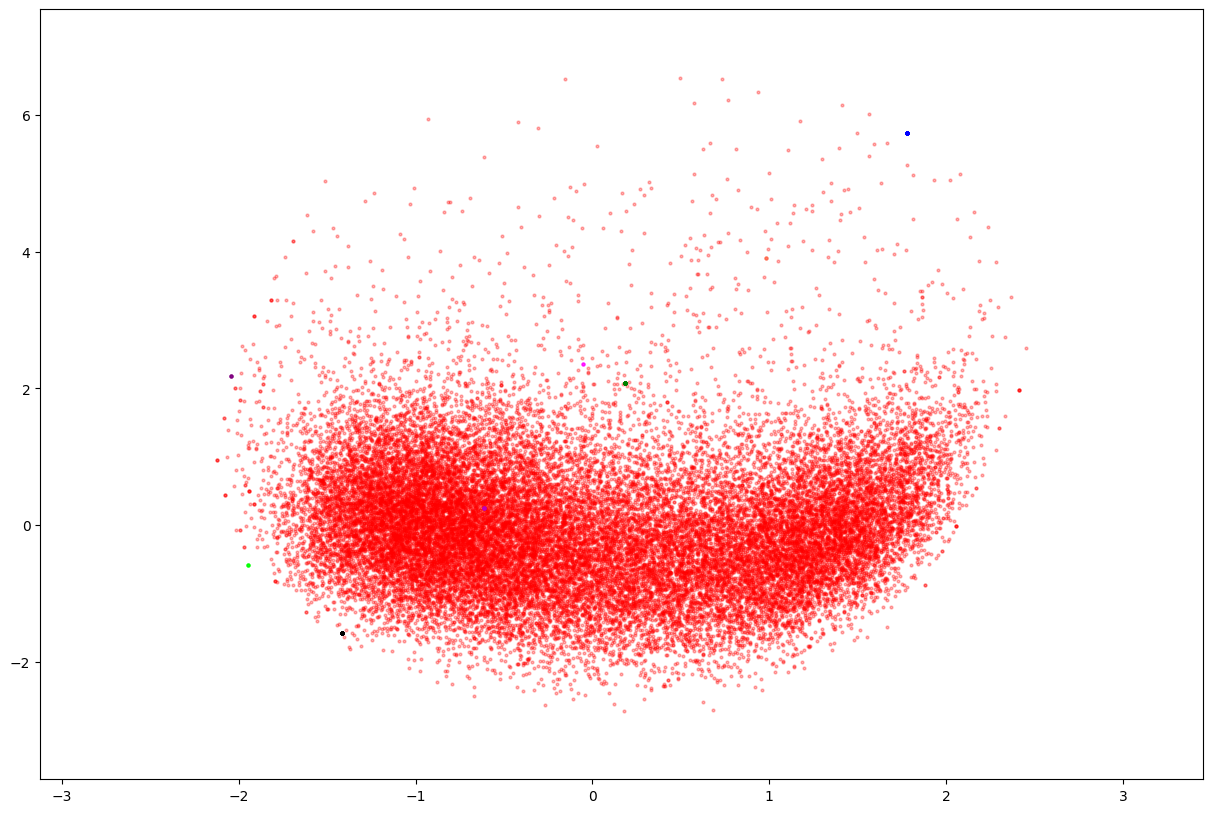

In [25]:
colores = ['r', 'g', 'b', 'k', 'm','tomato', 'fuchsia', 'purple','lime', 'navy', 'deeppink', 'gray', 'orange']
plot_pca_data([(votos_tres[dbscan_labels==u],colores[i]) for i, u in enumerate(np.unique(dbscan_labels)[0:])])